In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df_original = pd.read_csv("../Datasets/used_cars_data.csv", nrows=1000000)
df = df_original.copy()

/Users/felix/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Exploration

In [2]:
df.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,836741.000000,0.0,1000000.000000,948298.000000,836741.000000,948298.000000,0.0,1000000.000000,1.000000e+06,1000000.000000,9.493690e+05,505119.000000,1.000000e+06,1000000.000000,989415.000000,999922.000000,0.0,1000000.000000
mean,22.397711,NaN,77.900860,2885.696058,29.136505,243.199226,NaN,40.416730,2.752847e+08,-78.738906,3.149199e+04,1.498760,2.946037e+04,544.939789,4.258001,231655.097930,NaN,2017.584105
std,7.839936,NaN,110.203811,1280.325975,7.072437,87.289568,NaN,2.290862,8.982233e+06,5.525928,4.471792e+04,0.871043,1.905981e+04,1061.537258,0.519161,130356.960981,NaN,4.169655
min,7.000000,NaN,0.000000,700.000000,10.000000,65.000000,NaN,18.346700,2.049812e+07,-157.928000,0.000000e+00,1.000000,2.490000e+02,0.000000,1.000000,41593.000000,NaN,1915.000000
25%,18.000000,NaN,14.000000,2000.000000,25.000000,174.000000,NaN,39.301300,2.743874e+08,-82.599800,5.000000e+00,1.000000,1.800000e+04,0.000000,4.000000,63344.000000,NaN,2017.000000
50%,21.000000,NaN,35.000000,2500.000000,28.000000,240.000000,NaN,40.831900,2.784849e+08,-77.492600,1.096500e+04,1.000000,2.657000e+04,0.000000,4.333333,280865.000000,NaN,2019.000000
75%,26.000000,NaN,83.000000,3500.000000,33.000000,295.000000,NaN,42.052400,2.803928e+08,-74.295700,4.491200e+04,2.000000,3.750500e+04,783.000000,4.600000,334383.000000,NaN,2020.000000
max,127.000000,NaN,3573.000000,8400.000000,127.000000,1001.000000,NaN,61.203100,2.817657e+08,-66.078500,4.290461e+06,19.000000,3.195000e+06,142738.000000,5.000000,440951.000000,NaN,2021.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 66 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   vin                      1000000 non-null  object 
 1   back_legroom             951854 non-null   object 
 2   bed                      6448 non-null     object 
 3   bed_height               122639 non-null   object 
 4   bed_length               122639 non-null   object 
 5   body_type                995631 non-null   object 
 6   cabin                    19392 non-null    object 
 7   city                     1000000 non-null  object 
 8   city_fuel_economy        836741 non-null   float64
 9   combine_fuel_economy     0 non-null        float64
 10  daysonmarket             1000000 non-null  int64  
 11  dealer_zip               1000000 non-null  object 
 12  description              974485 non-null   object 
 13  engine_cylinders         970830 non-null   

In [4]:
df.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


### Plan cleaning steps

In [5]:
EXPLORATION_PHASE = False # Code in this block is only used for exploration of the data


if EXPLORATION_PHASE:
    ## bed
    df['bed'].unique() # remove this column, because most are nan
    df.drop(['bed'], axis=1, inplace=True) # only 5764 values are not nan

    ## bed_height
    df['bed_height'].unique()
    df.drop(['bed_height'], axis=1, inplace=True)

    ## bed_length, back_legroom
    def remove_unit(x):
        if (isinstance(x, str)):
            number = x.replace(' in', '')
            number = number.replace(' gal', '')
            number = number.replace(' seats', '')
            return float(number)
        else:
            return x

    def inches_to_floats(cols, df):
        for col in cols:
            df = df[df[col] != '--']
            df[col] = df[col].apply(lambda x: remove_unit(x))
            df = df[df[col].notna()]
            # df = df[df[col] != 0] # not sure about this

        return df

    cols = ['back_legroom', 'bed_length', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 'maximum_seating']
    df = inches_to_floats(cols, df)

    ## body_type # this is fine

    ## cabin
    df = df[df['cabin'].notna()]

    ## city
    len(df['city'].unique()) # 1299 maybe this is too much

    ## city_fuel_economy
    df = df[df['city_fuel_economy'].notna()]

    ## combine_fuel_economy
    df = df[df['combine_fuel_economy'].notna()]

    ## daysonmarket # this is fine

    ## dealer_zip  # many different values, maybe omit

    ## description 800.000 unique -> drop
    df.drop(['description'], axis=1, inplace=True)

    ## engine_cylinders 1hencode

    ## engine_displacement
    df = df[df['engine_displacement'].notna()]

    ## engine_type 1hencode

    ## exterior_color # 15219 unique values -> drop?

    ## fleet 463017 nan -> drop/replace with false?

    ## frame_damaged 463017 nan -> replace with false

    ## franchise_dealer - fine
    ## franchise_make -> fine
    ## front_legroom -> cast to float
    ## fuel_tank_volume -> cast to float

    ## fuel_type
    df = df[df['fuel_type'].notna()]

    ## has_accidents -> replace nan with false

    ## height -> cast to float

    ## highway_fuel_economy - nans: 163192
    df = df[df['highway_fuel_economy'].notna()]

    ## horsepower
    df = df[df['horsepower'].notna()]

    ## interior_color 20.000 different cats -> drop?

    ## isCab	is_certified	is_cpo	is_new	is_oemcpo -> replace nan with false

    ## latitude, longitude -> fine

    ## length -> cast to float

    ## listed_date	 ? to timestamp?

    ## listing_color - 1h encode

    ## listing_id, main_picture_url, sp_id -> drop

    ## major_options --> remove? 119300 unique

    ## make_name -> 1hE, 80 unique

    ## maximum_seating - cast to float

    ## milage
    df = df[df['milage'].notna()]

    ## model_name - uniqe - 1248 - remove?

    ## owner_count -> replace nan by 1 or 0

    ## power -- ?

    ## salvage - replace nan by false

    ## savings_amount - fine

    ## vehicle_damage_category	 replace nan by new cat?

    ## year - fine

#     to_one_hot_encode = ['transmission_display', 'wheel_system_display', 'wheel_system	']
#     remove_rows_with_nan_for_col = ['seller_rating', 'transmission', 'wheel_system']
#     drop_because_too_many_unique = ['sp_name', 'trimId', 'trim_name']
#     replace_nan_by_false = ['theft_title']
#     drop_col_because_no_relevant_data = [
#         'vehicle_damage_category', 'vin'
#     ]
#     apply_numeric_transformation = [
#         'back_legroom', 'bed_length', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 'maximum_seating'
#         'wheelbase', 'width'
#     ]



    ## grouped actions
    drop_colmns = ['vin', 'bed', 'bed_height', 'city', 'combine_fuel_economy', 'dealer_zip', 'description',
                  'listed_date', 'listing_id', 'main_picture_url', 'major_options', 'model_name', 'power',
                  'sp_id', 'sp_name', 'torque', 'trimId', 'trim_name', 'vehicle_damage_category', 'is_certified']
    convert_to_nr = ['back_legroom', 'bed_length', 'front_legroom', 'fuel_tank_volume', 'height', 'length',
                     'maximum_seating', 'wheelbase', 'width']
    oneHE_and_drop_nan = ['body_type', 'engine_cylinders', 'engine_type', 'franchise_make', 'listing_color', 'make_name',
                         'cabin', 'transmission', 'transmission_display', 'wheel_system']
    drop_rows_with_nan = ['price']
    nan_to_mean = ['city_fuel_economy', 'engine_displacement', 'highway_fuel_economy', 'horsepower', 'mileage',
                  'seller_rating', 'owner_count']
    replace_nan_by_false = ['fleet', 'frame_damaged', 'fuel_type', 'has_accidents', 'isCab', 'is_cpo',
                           'is_new', 'is_oemcpo', 'salvage', 'theft_title']
    no_action = ['daysonmarket', 'franchise_dealer', 'latitude', 'longitude', 'savings_amount', 'year']

    ## custom actions
    # owner_count -> replace nan by 1

In [6]:
## Exploration tools

# df = df_original.copy()
# (sum(df['city_fuel_economy'].isna()))
# (df['year'].unique())
# (df['mileage'].unique())

### Data Cleaning

In [7]:
import numpy as np

df = df_original.copy() # start with original dataframe each time cleaning is ran


## Delete all rows where price is NaN
df = df[df['price'].notna()]

## Drop all irrelevant columns
drop_colmns = ['vin', 'bed', 'bed_height', 'city', 'combine_fuel_economy', 'dealer_zip', 'description',
              'listed_date', 'listing_id', 'model_name', 'power',
              'sp_id', 'sp_name', 'torque', 'trimId', 'trim_name', 'vehicle_damage_category', 'is_certified',
              'interior_color', 'exterior_color']
df = df.drop(drop_colmns, axis=1)

## Convert columns of number with units as string to floats
def remove_unit(x):
    if (isinstance(x, str)):
        if x == '--':
            return np.NaN
        number = x.replace(' in', '')
        number = number.replace(' gal', '')
        number = number.replace(' seats', '')
        return float(number)
    else:
        return x

def text_to_float(cols, df):
    for col in cols:
        df[col] = df[col].apply(lambda x: remove_unit(x))
        df[col] = df[col].fillna(df[col].mean())

    return df

convert_to_nr = ['back_legroom', 'bed_length', 'front_legroom', 'fuel_tank_volume', 'height', 'length',
                 'maximum_seating', 'wheelbase', 'width']
df = text_to_float(convert_to_nr, df)

## Replace NaN by False
replace_nan_by_false = ['fleet', 'frame_damaged', 'fuel_type', 'has_accidents', 'isCab', 'is_cpo',
                       'is_new', 'is_oemcpo', 'salvage', 'theft_title']
for col in replace_nan_by_false:
    df[col] = df[col].fillna(False)
    
## Replace NaN by mean
nan_to_mean = ['city_fuel_economy', 'engine_displacement', 'highway_fuel_economy', 'horsepower', 'mileage',
              'seller_rating', 'owner_count']
for col in nan_to_mean:
    df[col] = df[col].fillna(df[col].mean())

## Replace NaN by most occuring category
categories = ['body_type', 'engine_cylinders', 'engine_type', 'franchise_make', 'listing_color', 'make_name',
                     'cabin', 'transmission', 'transmission_display', 'wheel_system', 'wheel_system_display']
for col in categories:
    df[col] = df[col].fillna(df[col].mode().iloc[0])


In [8]:
### Apply pre-processing steps from Krish

# Format major_options to turn list to #elements
def format_major_options(options):
    if pd.isnull(options):
        return 0
    else:
        return options.count(',') + 1
df['major_options'] = df['major_options'].apply(format_major_options)


# Format main_picture_url column to decide True or False for image availability
def format_main_picture(url):
    #print(url)
    if pd.isnull(url):
        return False
    else:
        return True
df['main_picture_url'] = df['main_picture_url'].apply(format_main_picture)


# Combine the values of city and highway fuel into a single value
def combined_fuel_economy(city_economy, highway_economy):
    return 1/((1/2) * ((1/city_economy) + (1/highway_economy)))
df['combine_fuel_economy'] = combined_fuel_economy(df['city_fuel_economy'] , df['highway_fuel_economy'])

# Remove additional columns that are now irrelevant
drop_more_colmns = ['city_fuel_economy', 'highway_fuel_economy', 'engine_displacement', 'engine_type', 'wheel_system_display']
df = df.drop(drop_more_colmns, axis=1)

In [9]:
print('Number of NaN values in dataset: ' + str(df.isnull().sum().sum())) ## Should be 0
nr_of_cols = len(df.columns.to_list())
print('Number of columns left in dataset: ' + str(nr_of_cols))
df.columns.to_list()

Number of NaN values in dataset: 0
Number of columns left in dataset: 42


['back_legroom',
 'bed_length',
 'body_type',
 'cabin',
 'daysonmarket',
 'engine_cylinders',
 'fleet',
 'frame_damaged',
 'franchise_dealer',
 'franchise_make',
 'front_legroom',
 'fuel_tank_volume',
 'fuel_type',
 'has_accidents',
 'height',
 'horsepower',
 'isCab',
 'is_cpo',
 'is_new',
 'is_oemcpo',
 'latitude',
 'length',
 'listing_color',
 'longitude',
 'main_picture_url',
 'major_options',
 'make_name',
 'maximum_seating',
 'mileage',
 'owner_count',
 'price',
 'salvage',
 'savings_amount',
 'seller_rating',
 'theft_title',
 'transmission',
 'transmission_display',
 'wheel_system',
 'wheelbase',
 'width',
 'year',
 'combine_fuel_economy']

### 1HotEncoding

In [10]:
df.head()

,back_legroom,bed_length,body_type,cabin,daysonmarket,engine_cylinders,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,isCab,is_cpo,is_new,is_oemcpo,latitude,length,listing_color,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,owner_count,price,salvage,savings_amount,seller_rating,theft_title,transmission,transmission_display,wheel_system,wheelbase,width,year,combine_fuel_economy
0,35.1,73.076681,SUV / Crossover,Crew Cab,522,I4,False,False,True,Jeep,41.2,12.7,Gasoline,False,66.5,177.0,False,False,True,False,18.3988,166.6,YELLOW,-66.1582,True,1,Jeep,5.0,7.000000,1.49876,23141.0,False,0,2.800000,False,A,9-Speed Automatic Overdrive,FWD,101.2,79.6,2019,25.326514
1,38.1,73.076681,SUV / Crossover,Crew Cab,207,I4,False,False,True,Land Rover,39.1,17.7,Gasoline,False,68.0,246.0,False,False,True,False,18.4439,181.0,BLACK,-66.0785,True,1,Land Rover,7.0,8.000000,1.49876,46500.0,False,0,3.000000,False,A,9-Speed Automatic Overdrive,AWD,107.9,85.6,2020,25.326514
2,35.4,73.076681,Sedan,Crew Cab,1233,H4,False,False,True,FIAT,43.3,15.9,Gasoline,False,58.1,305.0,False,False,False,False,18.3467,180.9,UNKNOWN,-66.1098,False,4,Subaru,5.0,31491.992027,3.00000,46995.0,False,0,4.258001,False,M,6-Speed Manual,AWD,104.3,78.9,2016,19.550000
3,37.6,73.076681,SUV / Crossover,Crew Cab,196,V6,False,False,True,Land Rover,39.0,23.5,Gasoline,False,73.0,340.0,False,False,True,False,18.4439,195.1,GRAY,-66.0785,True,0,Land Rover,7.0,11.000000,1.49876,67430.0,False,0,3.000000,False,A,8-Speed Automatic Overdrive,AWD,115.0,87.4,2020,25.326514
4,38.1,73.076681,SUV / Crossover,Crew Cab,137,I4,False,False,True,Land Rover,39.1,17.7,Gasoline,False,68.0,246.0,False,False,True,False,18.4439,181.0,BLACK,-66.0785,True,1,Land Rover,7.0,7.000000,1.49876,48880.0,False,0,3.000000,False,A,9-Speed Automatic Overdrive,AWD,107.9,85.6,2020,25.326514


In [11]:
def one_hot_category(df, column_name):
    
    dummies = pd.get_dummies(df[column_name], column_name)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([column_name], axis=1)
    
    return df
    
booleans_to_encode = ['fleet', 'frame_damaged', 'franchise_dealer', 'has_accidents', 'isCab', 'is_cpo', 'is_new', 'is_oemcpo', 'main_picture_url', 'salvage', 'theft_title']
categories_to_encode = ['body_type', 'cabin', 'engine_cylinders', 'franchise_make', 'listing_color', 'make_name', 'fuel_type', 'transmission', 'transmission_display', 'wheel_system']
for category in categories_to_encode + booleans_to_encode:
    df = one_hot_category(df, category)

In [12]:
df.head()

,back_legroom,bed_length,daysonmarket,front_legroom,fuel_tank_volume,height,horsepower,latitude,length,longitude,major_options,maximum_seating,mileage,owner_count,price,savings_amount,seller_rating,wheelbase,width,year,combine_fuel_economy,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,cabin_Crew Cab,cabin_Extended Cab,cabin_Large Crew Cab,cabin_Regular Cab,engine_cylinders_H4,engine_cylinders_H4 Hybrid,engine_cylinders_H6,engine_cylinders_I2,engine_cylinders_I3,engine_cylinders_I4,engine_cylinders_I4 Compressed Natural Gas,engine_cylinders_I4 Diesel,engine_cylinders_I4 Flex Fuel Vehicle,engine_cylinders_I4 Hybrid,engine_cylinders_I5,engine_cylinders_I5 Biodiesel,engine_cylinders_I5 Diesel,engine_cylinders_I6,engine_cylinders_I6 Diesel,engine_cylinders_I6 Hybrid,engine_cylinders_R2,engine_cylinders_V10,engine_cylinders_V10 Diesel,engine_cylinders_V12,engine_cylinders_V6,engine_cylinders_V6 Biodiesel,engine_cylinders_V6 Diesel,engine_cylinders_V6 Flex Fuel Vehicle,engine_cylinders_V6 Hybrid,engine_cylinders_V8,engine_cylinders_V8 Biodiesel,engine_cylinders_V8 Compressed Natural Gas,engine_cylinders_V8 Diesel,engine_cylinders_V8 Flex Fuel Vehicle,engine_cylinders_V8 Hybrid,engine_cylinders_W12,engine_cylinders_W12 Flex Fuel Vehicle,engine_cylinders_W16,engine_cylinders_W8,franchise_make_Acura,franchise_make_Alfa Romeo,franchise_make_Aston Martin,franchise_make_Audi,franchise_make_BMW,franchise_make_Bentley,franchise_make_Buick,franchise_make_Cadillac,franchise_make_Chevrolet,franchise_make_Chrysler,franchise_make_Dodge,franchise_make_FIAT,franchise_make_Ferrari,franchise_make_Ford,franchise_make_GMC,franchise_make_Genesis,franchise_make_Honda,franchise_make_Hyundai,franchise_make_INFINITI,franchise_make_Jaguar,franchise_make_Jeep,franchise_make_Kia,franchise_make_Lamborghini,franchise_make_Land Rover,franchise_make_Lexus,franchise_make_Lincoln,franchise_make_Lotus,franchise_make_MINI,franchise_make_Maserati,franchise_make_Mazda,franchise_make_McLaren,franchise_make_Mercedes-Benz,franchise_make_Mitsubishi,franchise_make_Nissan,franchise_make_Pagani,franchise_make_Porsche,franchise_make_RAM,franchise_make_Rolls-Royce,franchise_make_Rover,franchise_make_SRT,franchise_make_Scion,franchise_make_Shelby,franchise_make_Subaru,franchise_make_Toyota,franchise_make_Volkswagen,franchise_make_Volvo,franchise_make_smart,listing_color_BLACK,listing_color_BLUE,listing_color_BROWN,listing_color_GOLD,listing_color_GRAY,listing_color_GREEN,listing_color_ORANGE,listing_color_PINK,listing_color_PURPLE,listing_color_RED,listing_color_SILVER,listing_color_TEAL,listing_color_UNKNOWN,listing_color_WHITE,listing_color_YELLOW,make_name_AM General,make_name_AMC,make_name_Acura,make_name_Alfa Romeo,make_name_Aston Martin,make_name_Audi,make_name_Austin-Healey,make_name_BMW,make_name_Bentley,make_name_Bugatti,make_name_Buick,make_name_Cadillac,make_name_Chevrolet,make_name_Chrysler,make_name_Daewoo,make_name_Datsun,make_name_Dodge,make_name_Eagle,make_name_Edsel,make_name_FIAT,make_name_Ferrari,make_name_Fisker,make_name_Ford,make_name_Freightliner,make_name_GMC,make_name_Genesis,make_name_Geo,make_name_Honda,make_name_Hudson,make_name_Hummer,make_name_Hyundai,make_name_INFINITI,make_name_Isuzu,make_name_Jaguar,make_name_Jeep,make_name_Kaiser,make_name_Karma,make_name_Kia,make_name_Lamborghini,make_name_Land Rover,make_name_Lexus,make_name_Lincoln,make_name_Lotus,make_name_MG,make_name_MINI,make_name_Maserati,make_name_Maybach,make_name_Mazda,make_name_McLaren,make_name_Mercedes-Benz,make_name_Mercury,make_name_Mitsubishi,make_name_Nissan,make_name_Oldsmobile,make_name_Opel,make_name_Pagani,make_name_Pininfarina,make_name_Plymouth,make_name_Pontiac,make_name_Porsche,make_name_RAM,make_name_Rolls-Royce,make_name_SRT,make_name_Saab,make_name_Saturn,make_name_Scion,make_name_Shelby,make_name_Spyker,make_name_Studebaker,make_name_Subaru,mak

In [13]:
df.info() ## should have only numeric data types left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Columns: 291 entries, back_legroom to theft_title_True
dtypes: float64(17), int64(4), uint8(270)
memory usage: 425.3 MB


### Order Columns

In [14]:
# 0 - 19 are numeric
# 20 - 31 are boolean
# 32 - 40 are categorical
ordered_columns = ['back_legroom','daysonmarket','front_legroom','fuel_tank_volume','height','horsepower','latitude','length','longitude','major_options','maximum_seating','mileage','owner_count','savings_amount','seller_rating','wheelbase','width','year','combine_fuel_economy','fleet','frame_damaged','franchise_dealer','has_accidents','isCab','is_cpo','is_new','is_oemcpo','main_picture_url','salvage','theft_title','cabin','transmission','wheel_system','fuel_type','body_type','listing_color','engine_cylinders','transmission_display','franchise_make','make_name']

df_columns = df.columns.to_list()

final_column_order = []
for col in ordered_columns:
    sub_list = [i for i in df_columns if i.startswith(col)]
    final_column_order.append(sub_list)

In [15]:
print(final_column_order)

[['back_legroom'], ['daysonmarket'], ['front_legroom'], ['fuel_tank_volume'], ['height'], ['horsepower'], ['latitude'], ['length'], ['longitude'], ['major_options'], ['maximum_seating'], ['mileage'], ['owner_count'], ['savings_amount'], ['seller_rating'], ['wheelbase'], ['width'], ['year'], ['combine_fuel_economy'], ['fleet_False', 'fleet_True'], ['frame_damaged_False', 'frame_damaged_True'], ['franchise_dealer_False', 'franchise_dealer_True'], ['has_accidents_False', 'has_accidents_True'], ['isCab_False', 'isCab_True'], ['is_cpo_False', 'is_cpo_True'], ['is_new_False', 'is_new_True'], ['is_oemcpo_False', 'is_oemcpo_True'], ['main_picture_url_False', 'main_picture_url_True'], ['salvage_False', 'salvage_True'], ['theft_title_False', 'theft_title_True'], ['cabin_Crew Cab', 'cabin_Extended Cab', 'cabin_Large Crew Cab', 'cabin_Regular Cab'], ['transmission_A', 'transmission_CVT', 'transmission_Dual Clutch', 'transmission_M', 'transmission_display_1-Speed Automatic', 'transmission_display_1

### Training

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time


def fit(X, y):
    
    START = time.time()
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)


    lr = DecisionTreeRegressor(random_state=0).fit(X, y)
    
    END = time.time()

    print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
    print("Validation set score: {:.7f}".format(lr.score(X_val, y_val)))
    print("Validation set MSE: ", mean_squared_error(y_val, lr.predict(X_val)))
    
    return (END - START)

In [18]:
y = df['price'].to_numpy()

## simple solution, does not work for one hot encoded variable
# to_plot_x = []
# to_plot_y = []
# for i in range(2, len(convert_to_nr)):
#     X = df[convert_to_nr[1:i]].to_numpy()
#     duration = fit(X, y)
#     print('Duration: ' + str(duration) + ' seconds \n\n')
    
#     to_plot_y.append(duration)
#     to_plot_x.append(len(df[convert_to_nr[1:i]].columns.to_list()))

## solution for one hot encoded variables


EXECUTION_ROUNDS = 3
x_results = []
x_full_results = []
y_results = []
for j in range(0, EXECUTION_ROUNDS): # execute multiple times so we can take average and standard deviation
    
    
    to_plot_x = [] # will count the number of columns included
    to_plot_x_full = [] # will count the number of one hot encoded columns included
    to_plot_y = [] # will count the duration
    for i in range(1, len(final_column_order) - 36):

        list_of_column_lists = final_column_order[0:i]
        flat_column_list = [item for sublist in list_of_column_lists for item in sublist]

        print("New column added: " + list_of_column_lists[-1][0])

        X = df[flat_column_list].to_numpy()
        duration = fit(X, y)
        print('Duration: ' + str(duration) + ' seconds \n\n')

        to_plot_y.append(duration)
        to_plot_x.append(len(list_of_column_lists))
        to_plot_x_full.append(len(df[flat_column_list].columns.to_list()))
        
    x_results.append(to_plot_x)
    x_full_results.append(to_plot_x_full)
    y_results.append(to_plot_y)
    
    
    

New column added: back_legroom
Training set score: 0.25
Validation set score: 0.2297271
Validation set MSE:  300337361.92188865
Duration: 0.6339383125305176 seconds 


New column added: daysonmarket
Training set score: 0.35
Validation set score: 0.3083052
Validation set MSE:  269698938.19823766
Duration: 1.748042106628418 seconds 


New column added: front_legroom
Training set score: 0.62
Validation set score: 0.5795268
Validation set MSE:  163946850.98223445
Duration: 2.3770129680633545 seconds 


New column added: back_legroom
Training set score: 0.25
Validation set score: 0.2297271
Validation set MSE:  300337361.92188865
Duration: 0.6713621616363525 seconds 


New column added: daysonmarket
Training set score: 0.35
Validation set score: 0.3083052
Validation set MSE:  269698938.19823766
Duration: 1.7791008949279785 seconds 


New column added: front_legroom
Training set score: 0.62
Validation set score: 0.5795268
Validation set MSE:  163946850.98223445
Duration: 2.253459930419922 sec

In [38]:
import numpy as np
## compute the averages and standard deviations


x = x_results[0]

y_mean = [float(sum(col))/len(col) for col in zip(*y_results)]
y_stdev = [np.std(col) for col in zip(*y_results)]

### Plot results

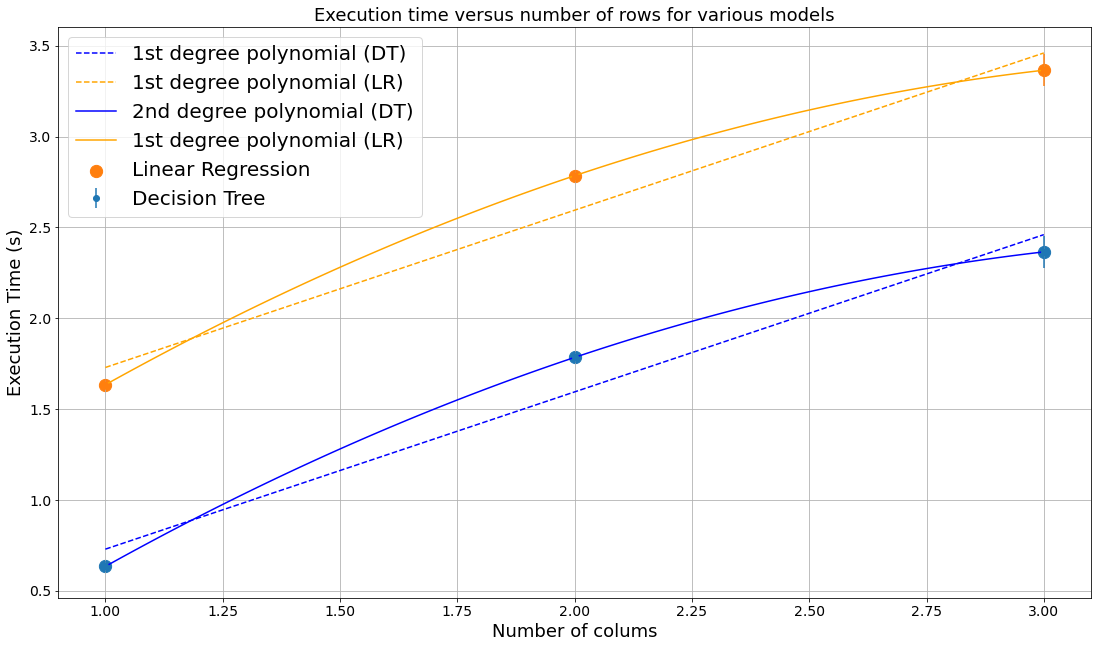

In [83]:
import matplotlib.pyplot as plt


plt.scatter(x, y_mean, marker='o', s=150)
plt.errorbar(x, y_mean, y_stdev, linestyle='None', marker='o', label='Decision Tree')
plt.scatter(x, np.array(y_mean) + 1, marker='o', label='Linear Regression', s=150) # mock up for second model
plt.errorbar(x, np.array(y_mean) + 1, y_stdev, linestyle='None', marker='o') # mock up for second model

# plt.scatter(x, y_mean)
plt.xlabel('Number of colums', fontsize=18)
plt.ylabel('Execution Time (s)', fontsize=18)
plt.title('Execution time versus number of rows for various models', fontsize=18)




## Add a linear fit for both models
x_synth = np.linspace(1, x[-1], 100)

coef = np.polyfit(x, y_mean, 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x, poly1d_fn(x), '--b', label='1st degree polynomial (DT)')

coef = np.polyfit(x, np.array(y_mean) + 1, 1) # mock up model
poly1d_fn = np.poly1d(coef) 
plt.plot(x, poly1d_fn(x), '--', color='orange', label='1st degree polynomial (LR)')

coef = np.polyfit(x, y_mean, 2)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_synth, poly1d_fn(x_synth), '-b', label='2nd degree polynomial (DT)')

coef = np.polyfit(x, np.array(y_mean) + 1, 2) # mock up model
poly1d_fn = np.poly1d(coef) 
plt.plot(x_synth, poly1d_fn(x_synth), '-', color='orange', label='1st degree polynomial (LR)')

# Plot styling
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(loc=2, prop={'size': 20})

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

In [84]:
# todo: show categorical vs numerical vs boolean plots
# make another plot with the count of one hot encoded variables
